In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA


In [2]:
# Load selected feature dataset
df = pd.read_csv("../data/cleveland_selected_features.csv")

# Separate features and target for comparison later
X = df.drop("target", axis=1)
y = df["target"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


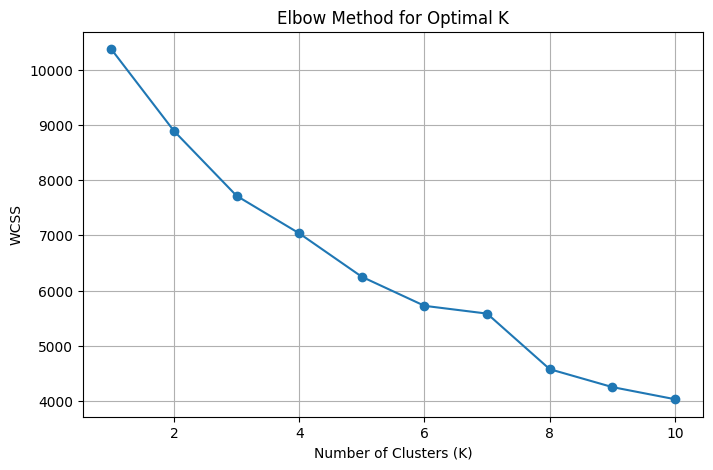

In [3]:
# Elbow Method to Determine Optimal K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df["KMeans_Cluster"] = kmeans_labels


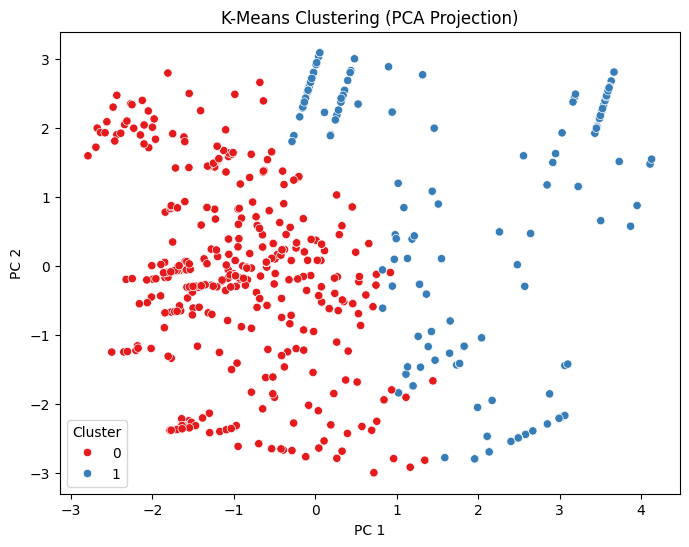

In [14]:
# Visualize K-Means Clustering with PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="Set1")
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()


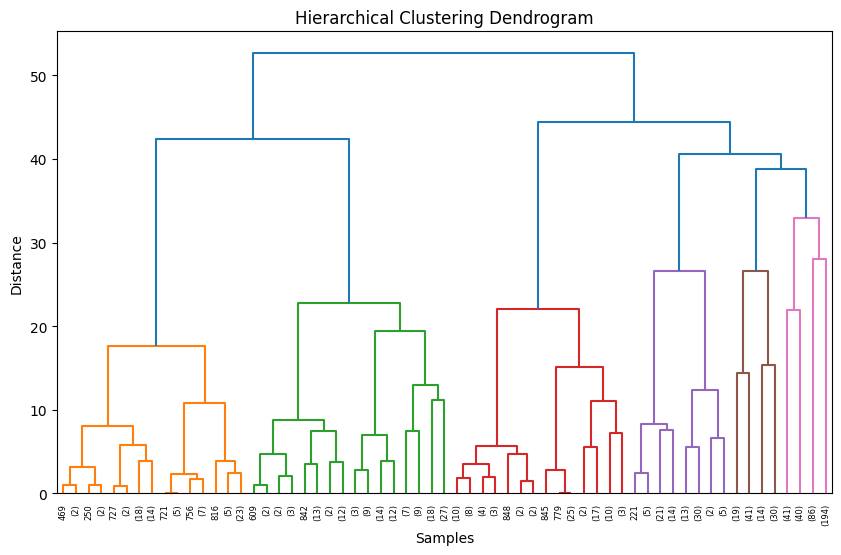

In [15]:
linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [16]:
hierarchical_labels = fcluster(linked, 2, criterion='maxclust')

# Add to DataFrame
df["Hierarchical_Cluster"] = hierarchical_labels


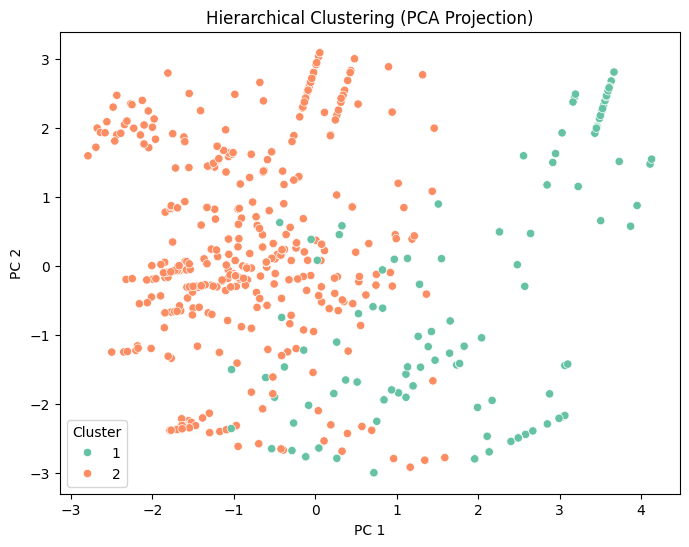

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette="Set2")
plt.title("Hierarchical Clustering (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()


In [18]:
# KMeans comparison
print("K-Means Cluster vs Actual:")
print(pd.crosstab(df["target"], df["KMeans_Cluster"]))

# Hierarchical comparison
print("\nHierarchical Cluster vs Actual:")
print(pd.crosstab(df["target"], df["Hierarchical_Cluster"]))


K-Means Cluster vs Actual:
KMeans_Cluster    0    1
target                  
0               117   81
1               517  149

Hierarchical Cluster vs Actual:
Hierarchical_Cluster    1    2
target                        
0                      57  141
1                     162  504


 Summary Table

| Method           | Accuracy (approx.) |
| ---------------- | ------------------ |
| **K-Means**      | \~30.8%            |
| **Hierarchical** | \~74.7%            |
